In [6]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from matplotlib import pyplot
from pandas import DataFrame

# loading iris dataset 
iris = datasets.load_iris()
X, y = iris.data[:, 1:3], iris.target

clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

# Voting Classifier with hard voting 
eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],voting='hard')

# Ensemble of Models 

for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
    scores = cross_val_score(clf, X, y, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))
    
#estimator = [] 
#estimator.append(('LR',LogisticRegression(solver ='lbfgs',multi_class ='multinomial',max_iter = 200))) 
#estimator.append(('SVC', SVC(gamma ='auto', probability = True))) 
# estimator.append(('DTC', DecisionTreeClassifier())) 


Accuracy: 0.95 (+/- 0.04) [Logistic Regression]
Accuracy: 0.94 (+/- 0.04) [Random Forest]
Accuracy: 0.91 (+/- 0.04) [naive Bayes]
Accuracy: 0.95 (+/- 0.04) [Ensemble]


In [15]:
# More Model ensembling techniques now #
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from itertools import product


# Loading some example data

iris = datasets.load_iris()
X = iris.data[:, [0, 2]]

y = iris.target

# Training classifiers
clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(kernel='rbf', probability=True)
eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2), ('svc', clf3)], voting='soft', weights=[2, 1, 2])

clf1 = clf1.fit(X, y)
clf2 = clf2.fit(X, y)
clf3 = clf3.fit(X, y)
eclf = eclf.fit(X, y)

for clf, label in zip([clf1, clf2, clf3, eclf], ['Deicision Tree', 'K-Nearest Neighbour', 'SVC', 'Ensemble']):
    scores = cross_val_score(clf, X, y, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))


NameError: name 'my_model' is not defined

In [17]:
# Now we want to analyse the models using tfma 
# This setup was tested with TF 2.10 and TFMA 0.41 (using colab), but it should
# also work with the latest release.
import sys
import os
from sklearn.model_selection import KFold
import numpy as np

# Confirm that we're using Python 3
assert sys.version_info.major==3, 'This notebook must be run using Python 3.'

import tensorflow as tf
# print('TF version: {}'.format(tf.__version__))
import apache_beam as beam
#print('Beam version: {}'.format(beam.__version__))
import tensorflow_model_analysis as tfma
# print('TFMA version: {}'.format(tfma.__version__))

from tensorflow import keras

X = iris.data[:, [0, 2]]
y = iris.target

# Define a simple sequential model
def create_model():
  model = tf.keras.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(2,)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10)
  ])

  model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

  return model

# Create a basic model instance
model = create_model()

for kfold, (train, test) in enumerate(KFold(n_splits=3, 
                                shuffle=True).split(X, y)):
    # clear the session 
    tf.keras.backend.clear_session()

    # calling the model and compile it 
    #seq_model = my_model()
    model.compile(
        loss  = tf.keras.losses.CategoricalCrossentropy(),
        metrics  = tf.keras.metrics.CategoricalAccuracy(),
        optimizer = tf.keras.optimizers.Adam())

    print('Train Set')
    print(X[train].shape)
    print(y[train].shape)

    print('Test Set')
    print(X[test].shape)
    print(y[test].shape)

    # run the model 
    model.fit(X[train], y[train],
              batch_size=128, epochs=2, validation_data=(X[test], y[test]))
    
    model.save_weights(f'wg_{kfold}.h5')

# Display the model's architecture
model.summary()


# The tf.keras.callbacks.ModelCheckpoint callback allows you to continually 
# save the model both during and at the end of training

checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

# Train the model with the new callback
model.fit(X[train], 
          y[train],  
          epochs=10,
          validation_data=(X[test], y[test]),
          callbacks=[cp_callback])  # Pass callback to training

filepath = "/home/antillas/collabos/model_aggregation"

# Save all The model's configuration (architecture), The model's weights, 
# Saves a model as a .keras file - The model's optimizer's state (if any)

model.save("kera_model_one.keras")

# Saves all layer weights to a .weights.h5 file.
model.save_weights(
    filepath, overwrite=True
)

Train Set
(100, 2)
(100,)
Test Set
(50, 2)
(50,)
Epoch 1/2


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2221, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5573, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 10) are incompatible


In [8]:
# Next steps for the 
'''
1: Use the metadat extractor here to retrieve any metadata about the pretrained models

2: A component for the metadata schema validator

3: Give weights to each model metadata -> Kind of a fitnesss functions

4: Encode metadata as chromosomes

5: Do generic algorithm for Model aggregation

6: Do FedAvg aggregations, Bagging/stacking/Voting

7: Compare results from 5 to results from 6
'''

'''
  FedAvg - Load pretrained models and do aggregations - mobilenet models
'''


import collections

import numpy as np
import tensorflow as tf
import tensorflow_federated as tff
from urllib.request import urlopen
from PIL import Image
import timm

!pip install tf-keras==2.15.0
!pip install tensorflow==2.15.2

def model_fn():
  # We _must_ create a new model here, and _not_ capture it from an external
  # scope. TFF will call this within different graph contexts.
  # Get pre-trained mobileNet models 
  keras_model = timm.create_model('mobilenetv4_hybrid_large.ix_e600_r384_in1k', pretrained=True, features_only=True,)
    
  # keras_model = create_keras_model()
  return tff.learning.models.from_keras_model(
      keras_model,
      loss=tf.keras.losses.SparseCategoricalCrossentropy(),
      metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])


if "__name__" == main:
    training_process = tff.learning.algorithms.build_weighted_fed_avg(
        model_fn,
        client_optimizer_fn=lambda: tf.keras.optimizers.SGD(learning_rate=0.02),
        server_optimizer_fn=lambda: tf.keras.optimizers.SGD(learning_rate=1.0))

    print(training_process.initialize.type_signature.formatted_representation())  


NameError: name 'python' is not defined

KeyError: '0'

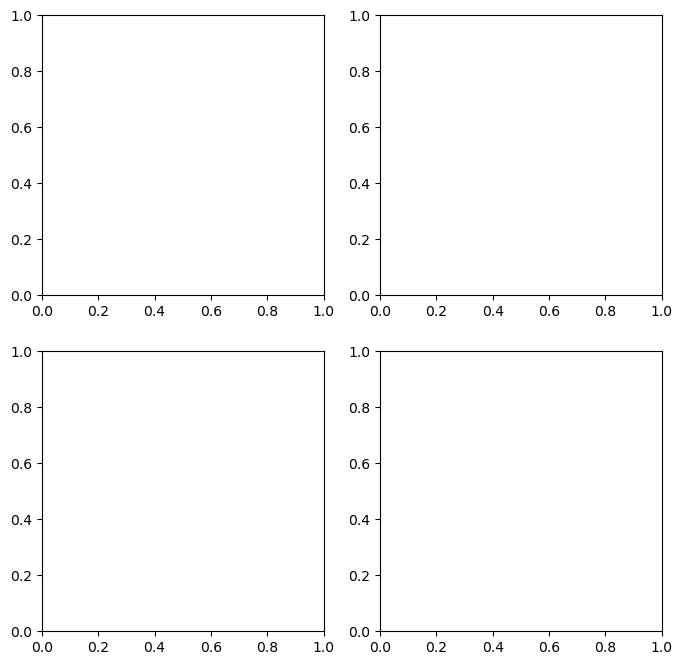

In [11]:
# Model metadata setting up 
# And splitting dataset for drift measures

import os

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from scipy import ndimage
from scipy.stats import ks_2samp
from scipy.spatial import distance

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# from scikit-image.io import imread, imshow

def calculate_psi(expected, actual, buckettype='bins', buckets=10, axis=0):

    def psi(expected_array, actual_array, buckets):
        def scale_range (input, min, max):
            input += -(np.min(input))
            input /= np.max(input) / (max - min)
            input += min
            return input

        breakpoints = np.arange(0, buckets + 1) / (buckets) * 100
        breakpoints = scale_range(breakpoints, np.min(expected_array), np.max(expected_array))
        expected_percents = np.histogram(expected_array, breakpoints)[0] / len(expected_array)
        actual_percents = np.histogram(actual_array, breakpoints)[0] / len(actual_array)
        def sub_psi(e_perc, a_perc):
            if a_perc == 0:
                a_perc = 0.0001
            if e_perc == 0:
                e_perc = 0.0001

 

            value = (e_perc - a_perc) * np.log(e_perc / a_perc)
            return(value)

 

        psi_value = np.sum(sub_psi(expected_percents[i], actual_percents[i])

                                             for i in range(0, len(expected_percents)))

        return(psi_value)

    if len(expected.shape) == 1:
        psi_values = np.empty(len(expected.shape))
    else:
        psi_values = np.empty(expected.shape[axis])

    for i in range(0, len(psi_values)):
        psi_values = psi(expected, actual, buckets)

    return(psi_values)


# Trying a different PSI procedure
def psi(reference, monitored, bins=None):
    """
    Calculate the Population Stability Index (PSI) between a reference dataset and a monitored dataset.
    
    Parameters:
    reference (numpy.array): The reference dataset, representing the baseline distribution.
    monitored (numpy.array): The monitored dataset, representing the distribution to compare against the reference.
    bins (int, optional): The number of bins to use for the histograms. If set to None, Doane's formula will be used to calculate the number of bins. Default is None.
    
    Returns:
    float: The calculated PSI value. A higher value indicates greater divergence between the two distributions.
    """
    # Get the full dataset
    full_dataset = np.concatenate((reference, monitored))

    # If bins is not parametrized, use Doane's formula for calculating number of bins
    if bins is None:
        _, bin_edges = np.histogram(full_dataset, bins="doane")
    else:  # If number of bins is specified
        bin_edges = np.linspace(min(min(reference), min(monitored)), max(max(reference), max(monitored)), bins + 1)

    # Calculate the histogram for each dataset
    reference_hist, _ = np.histogram(reference, bins=bin_edges)
    monitored_hist, _ = np.histogram(monitored, bins=bin_edges)

    # Convert histograms to proportions
    reference_proportions = reference_hist / np.sum(reference_hist)
    monitored_proportions = monitored_hist / np.sum(monitored_hist)

    # Replace zeroes to avoid division by zero or log of zero errors
    monitored_proportions = np.where(monitored_proportions == 0, 1e-6, monitored_proportions)
    reference_proportions = np.where(reference_proportions == 0, 1e-6, reference_proportions)

    # Calculate PSI
    psi_values = (monitored_proportions - reference_proportions) * np.log(monitored_proportions / reference_proportions)
    psi = np.sum(psi_values)

    print("************* ", psi)

    return psi

## Calculate psi for features
psi_list = []

# top_feature_list=df_salary_high.columns
'''
for feature in range(len(train_images[0])): #top_feature_list:
        # Assuming you have a validation and training set
        #psi_t = calculate_psi( dataset_ver1[0][feature], train_images[0][feature])
        # psi_t = psi( dataset_ver1[feature], train_images[feature])
        psi_list.append(psi_t)      
        print('Stability index for column ',feature,'is',psi_t)
'''

def dataset_ver_one (image):
    return ndimage.prewitt(image, axis=0)
    #return ds.filter(lambda x: x < 5)

def dataset_ver_two (image):
    return ndimage.prewitt(image, axis=1)
    #return ds.filter(lambda x: x < 5)

def dataset_ver_three (prewitt_h, prewitt_v):
    magnitude = np.sqrt(prewitt_h ** 2 + prewitt_v ** 2)
    magnitude *= 255 / np.max(magnitude)
    return magnitude
    # dimage.prewitt(ds[0], axis=1)
    # return ds.filter(lambda x: x < 5)
    
def generate_dataset_from_mnist(train_images, train_labels):
    new_dataset = train_images.apply(dataset_fn)
    list(dataset.as_numpy_iterator())

    

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
# print(len(train_images), train_labels[3000])

# plt.matshow(train_images[0])

# edges_prewitt_vertical = prewitt_v(train_images[0])
dataset_ver1 = []
dataset_ver2 = []
dataset_ver3 = []

for t in range(len(train_images)):
    prewitt_h = dataset_ver_one(train_images[t]) #, axis=0)
    prewitt_v = dataset_ver_two(train_images[t]) #, axis=1)    
    magnitude = dataset_ver_three(prewitt_h, prewitt_v)
    dataset_ver1.append(prewitt_h)
    dataset_ver2.append(prewitt_v)
    dataset_ver3.append(magnitude)

#df_1 = pd.DataFrame(dataset_ver1)
#df_2 = pd.DataFrame(dataset_ver2)
#df_3 = pd.DataFrame(dataset_ver3)
#print("**** ", df_1)

# print("-->> ", dataset_ver1)

# print("***************** ", len(dataset_ver3))
# magnitude = np.sqrt(prewitt_h ** 2 + prewitt_v ** 2)
# magnitude *= 255 / np.max(magnitude) # Normalization


fig, axes = plt.subplots(2, 2, figsize = (8, 8))

#axes[0, 0].imshow(train_images[3000])
#axes[0, 1].imshow(dataset_ver1[3000])
#axes[1, 0].imshow(dataset_ver2[3000])
#axes[1, 1].imshow(dataset_ver3[3000])
#titles = ["original dataset", "dataset_ver1", "dataset_ver2", "dataset_ver3"]
#for i, ax in enumerate(axes.ravel()):
#    ax.set_title(titles[i])
#    ax.axis("off")

#plt.show() 
#plt.show() 


#base_df = pd.DataFrame(train_images)
#current_df = pd.DataFrame(dataset_ver1)
'''
    We try to adjust the image feature set here
    Adding or removing some features, or adding mear gaussian noise

import mahotas as mh
def image_noiser(image_shape)->image:
    im = mh.imread('7Esco.jpg', as_grey=1)
    # load image and convert to gray
    im2 = im[::2,::2]
    im2 = mh.gaussian_filter(im2, 1.4)
    # downsample and blur (remove noise)
    im2 = 255 - im2
    # invert the image
    mean_filtered = mh.convolve(im2.astype(float), np.ones((9,9))/81.)
    # mean filtering with a convolution
    imc = im2 > mean_filtered - 4
    # might need to adjust the number 4 here, but it worked well for this image.
    mh.imsave('binarized.png', (imc*255).astype(np.uint8))
    
    #gauss_noise = np.zeros((640,480),dtype=np.uint8)
    #cv2.randn(gauss_noise,128,20)
    #gauss_noise=(gauss_noise*0.5).astype(np.uint8)
'''

def get_drift_in_dataset(base_df,current_df)->bool:
    status = True
    report={}
    threshold=0.05
    for column in base_df.columns:
        d1 = base_df[column]
        d2 = current_df[column]
        is_same_dist = ks_2samp(d1,d2)

        if threshold<=is_same_dist.pvalue:
            is_found=False
        else:
            status = False
            is_found=True
    
        report.update({column:{"p_value":float(is_same_dist.pvalue),"drift_status":is_found}}) 
    print("p_value: ",float(is_same_dist.pvalue),"drift_status: ",is_found)
    return report

# for t in range(len(train_images[1])):
#base_df =  pd.Dataframe(train_images # [t] # pd.DataFrame(t) #
#current_df =  dataset_ver1 # [t] # pd.DataFrame(t) #
#get_drift_in_dataset(base_df, current_df)

#base_df =  pd.DataFrame(train_images[0]) # [t] # pd.DataFrame(t) #
#current_df =  pd.DataFrame(dataset_ver1[0]) # [t] # pd.DataFrame(t) #
#get_drift_in_dataset(base_df, current_df)


from evidently.report import Report
from evidently.metrics import DataDriftTable
from evidently.metrics import DatasetDriftMetric
from evidently.metrics import DatasetSummaryMetric
from evidently.metrics import DatasetMissingValuesMetric
import pandas as pd

#data_drift_dataset_report = Report(metrics=[DatasetDriftMetric(), DataDriftTable(), ])

#data_drift_dataset_report.run(reference_data=pd.DataFrame(train_images), current_data=pd.DataFrame(dataset_ver1))



# To speed up these runs, use the first 1000 examples
train_labels = train_labels[:1000]
test_labels = test_labels[:1000]

train_images = train_images[:1000].reshape(-1, 28 * 28) / 255.0
test_images = test_images[:1000].reshape(-1, 28 * 28) / 255.0



from data_drift_detector import DataDriftDetector

# initialize detector
# current_data = pd.DataFrame(dataset_ver1[])

data_drift_dataset_report = Report(metrics=[DatasetDriftMetric(), DataDriftTable(), ])

for data in range(len(train_images)):
    current_data = pd.DataFrame(dataset_ver1[data])
    origina_data = pd.DataFrame(train_images[data])
    # print("\n ....", train_images[data].shape, )

    

    data_drift_dataset_report.run(reference_data=origina_data, current_data=current_data)
    
    #detector = DataDriftDetector(df_prior = origina_data, df_post = current_data)
    #t = detector.calculate_drift()
    #print("\n ---<< ", t)

data_drift_dataset_report.json()

# detector = DataDriftDetector(df_prior = train_images, df_post = current_data)

# methods to compare and analyze differences
# t = detector.calculate_drift()

# print (t)
#detector.plot_numeric_to_numeric()
#detector.plot_categorical_to_numeric()
#detector.plot_categorical()
#detector.compare_ml_efficacy(target_column="some_target_column")


In [14]:
import pandas as pd
import numpy as np
import json

json_data = '[{"ID":10,"Name":"Pankaj","Role":"CEO"},' \
            '{"ID":20,"Name":"David Lee","Role":"Editor"}]'



from sklearn import datasets
from sklearn import ensemble
from sklearn import model_selection

from evidently import ColumnMapping
from evidently.options import ColorOptions
from evidently.report import Report

from evidently.metrics import ColumnDriftMetric
from evidently.metrics import DataDriftTable
from evidently.metrics import DatasetDriftMetric
from evidently.metrics import ColumnCategoryMetric
from evidently.metrics import ColumnDistributionMetric
from evidently.metrics import ColumnValuePlot
from evidently.metrics import ColumnQuantileMetric
from evidently.metrics import ColumnCorrelationsMetric
from evidently.metrics import ColumnValueListMetric
from evidently.metrics import ColumnValueRangeMetric

#Dataset for Data Quality and Integrity
adult_data = datasets.fetch_openml(name='adult', version=2, as_frame=True)
adult = adult_data.frame
print("\n -----> ", adult.shape)


adult_ref = adult[~adult.education.isin(['Some-college', 'HS-grad', 'Bachelors'])]
adult_cur = adult[adult.education.isin(['Some-college', 'HS-grad', 'Bachelors'])]

print("\n =====> ", adult_ref)
print("\n ******> ", adult_cur.shape)

adult_cur.iloc[:2000, 3:5] = np.nan

data_drift_dataset_report = Report(metrics=[
    DataDriftTable(num_stattest='kl_div', cat_stattest='psi'),    
])

data_drift_dataset_report.run(reference_data=adult_ref, current_data=adult_cur)
data_drift_dataset_report

#report in a JSON format
# data_drift_dataset_report.json()

json_object = json.loads(data_drift_dataset_report.json())

json_formatted_str = json.dumps(json_object, indent=2)

# print(json_formatted_str)




 ----->  (48842, 15)

 =====>         age         workclass  fnlwgt    education  education-num  \
0       25           Private  226802         11th              7   
2       28         Local-gov  336951   Assoc-acdm             12   
5       34           Private  198693         10th              6   
7       63  Self-emp-not-inc  104626  Prof-school             15   
9       55           Private  104996      7th-8th              4   
...    ...               ...     ...          ...            ...   
48832   32           Private   34066         10th              6   
48833   43           Private   84661    Assoc-voc             11   
48834   32           Private  116138      Masters             14   
48835   53           Private  321865      Masters             14   
48837   27           Private  257302   Assoc-acdm             12   

           marital-status         occupation   relationship  \
0           Never-married  Machine-op-inspct      Own-child   
2      Married-civ-spouse